In [1]:
clean_up=True
%run StdPackages.ipynb

### Emissions and targets

Load model data:

In [2]:
name = 'm'
dbs = {t: GpyDB(pickle_path = os.path.join(d['processedData'], f'{name}_{t}')) for t in range(1990, 2020)}
glbls = {t: loadFromPickle(f'glob_{t}', repo = d['processedData']) for t in range(1990, 2020)}

Extract data on historical emissions:

In [3]:
M = glbls[1990].db['MData'].vals
Mnorm = (100 * M / glbls[1990].db['M1990'].vals).rename('Emissions')
ts = [1990, 2005, 2011]

### Type I: Effective single year targets

For the four regimes, plot the "single year" target without accumulated overshoot. Plot against historical emissions.

In [4]:
T = 2075
dfs_SY = {t: dbs[t].get('MTarget_SY').loc[:T].rename('Single year targets')*100 for t in ts}
dfs_SY[2020] =  pd.concat([pd.Series([30, 0], index = pd.Index([2030, 2045], name = 't')),
                           pd.Series(-10, index = pd.Index(range(2050, T+1), name = 't'))], 
                          axis = 0).rename('Single year targets')
dfs_SY[1990] = pd.concat([dfs_SY[1990], Mnorm.loc[1990:2005].rename('Emissions (data)')], axis =1)
dfs_SY[2005] = pd.concat([dfs_SY[2005], Mnorm.loc[1990:2011].rename('Emissions (data)')], axis =1)
dfs_SY[2011] = pd.concat([dfs_SY[2011], Mnorm.loc[1990:2020].rename('Emissions (data)')], axis =1)
dfs_SY[2020] = pd.concat([dfs_SY[2020], Mnorm.loc[1990:2021].rename('Emissions (data)')], axis =1)

*plot:*

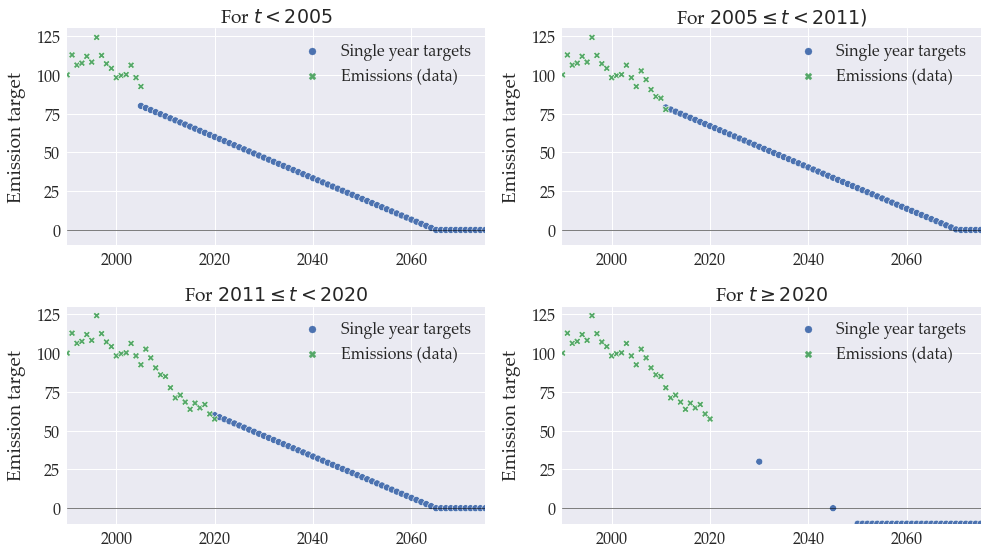

In [5]:
mult_graphs();
fig, axes = plt.subplots(2,2, figsize  = (14,8));
ax = plt.subplot(2,2,1);
seaborn.scatterplot(data = dfs_SY[1990], ax = ax);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
ax.set_xlim([1990, T]);
ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $t< 2005$');

ax = plt.subplot(2,2,2);
seaborn.scatterplot(data = dfs_SY[2005], ax = ax);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
ax.set_xlim([1990, T]);
ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $2005\leq t < 2011)$');

ax = plt.subplot(2,2,3);
seaborn.scatterplot(data = dfs_SY[2011], ax = ax);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
ax.set_xlim([1990, T]);
ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $2011\leq t < 2020$');

ax = plt.subplot(2,2,4);
seaborn.scatterplot(data = dfs_SY[2020], ax = ax);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
ax.set_xlim([1990, T]);
ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $t\geq 2020$');
fig.tight_layout()
# fig.legend(df1.columns,loc=8,ncol=3,frameon=True)
# fig.subplots_adjust(bottom=0.12);
fig.savefig(f"{d['figs']}\\SingleYearFP.pdf",edgecolor='k')

### Type II: Linear reduction paths

In [6]:
dfs_IIa = {t: dbs[t].get('MTarget_2A').loc[:T].rename('Type IIa')*100 for t in ts}
dfs_IIb = {t: dbs[t].get('MTarget_2B').loc[:T].rename('Type IIb')*100 for t in ts}
dfs_IIa[2020] = auxiliary.extrapolateUpper(pd.concat([pd.Series(np.linspace(Mnorm.xs(2020), 30, 11), index = pd.Index(range(2020, 2031), name = 't')).iloc[0:-1],
                                                      pd.Series(np.linspace(30, 0, 16), index = pd.Index(range(2030, 2046), name = 't')).iloc[0:-1],
                                                      pd.Series(np.linspace(0, -10, 6), index = pd.Index(range(2045, 2051), name = 't'))],
                                                     axis = 0), T).rename('Type IIa')
dfs_IIb[2020] = auxiliary.extrapolateUpper(pd.concat([pd.Series(np.linspace(60, 30, 11), index = pd.Index(range(2020, 2031), name = 't')).iloc[0:-1],
                                                      pd.Series(np.linspace(30, 0, 16), index = pd.Index(range(2030, 2046), name = 't')).iloc[0:-1],
                                                      pd.Series(np.linspace(0, -10, 6), index = pd.Index(range(2045, 2051), name = 't'))],
                                                     axis = 0), T).rename('Type IIb')

*collect database:*

In [7]:
ts_ = ts + [2020]
dfs_II = {t: pd.concat([dfs_IIa[t], dfs_IIb[t], dfs_SY[t]['Emissions (data)'].sort_index().dropna().loc[:t]], axis = 1).sort_index() for t in dfs_IIa}

*plot:*

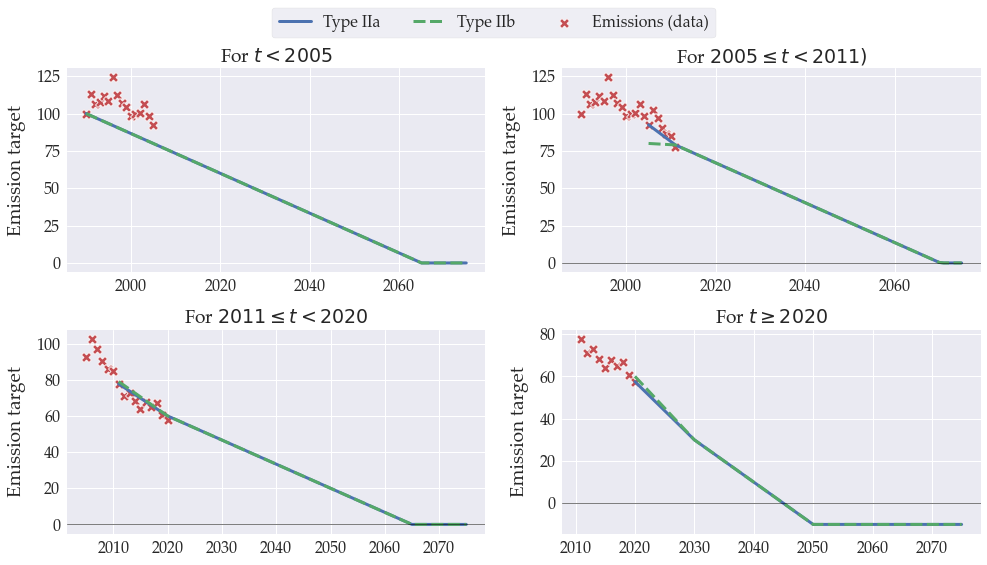

In [17]:
mult_graphs();
linekwargs = {'linewidth': 3, 'legend': False}
scatterkwargs = {'color': colors[2], 'marker': 'X', 's' : 100}
fig, axes = plt.subplots(2,2, figsize  = (14,8));
ax = plt.subplot(2,2,1);
seaborn.lineplot(data = dfs_II[1990][['Type IIa','Type IIb']], ax = ax, **linekwargs);
seaborn.scatterplot(data = dfs_II[2005]['Emissions (data)'], ax =ax, **scatterkwargs);
# ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
# ax.set_xlim([1990, T]);
# ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $t< 2005$');

ax = plt.subplot(2,2,2);
seaborn.lineplot(data = dfs_II[2005][['Type IIa','Type IIb']], ax = ax,  **linekwargs);
seaborn.scatterplot(data = dfs_II[2011]['Emissions (data)'], ax =ax, **scatterkwargs);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
# ax.set_xlim([1990, T]);
# ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $2005\leq t < 2011)$');

ax = plt.subplot(2,2,3);
seaborn.lineplot(data = dfs_II[2011][['Type IIa','Type IIb']], ax = ax, **linekwargs);
seaborn.scatterplot(data = dfs_II[2020]['Emissions (data)'].loc[2005:], ax =ax, **scatterkwargs);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
# ax.set_xlim([1990, T]);
# ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $2011\leq t < 2020$');

ax = plt.subplot(2,2,4);
seaborn.lineplot(data = dfs_II[2020][['Type IIa','Type IIb']], ax = ax, **linekwargs);
seaborn.scatterplot(data = dfs_II[2020]['Emissions (data)'].loc[2011:], ax =ax, **scatterkwargs);
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
# ax.set_xlim([1990, T]);
# ax.set_ylim([-10, 130]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission target', labelpad=10);
ax.set_title('For $t\geq 2020$');
fig.tight_layout()
fig.legend(dfs_II[1990].columns,loc=9,ncol=3,frameon=True)
fig.subplots_adjust(top=0.88);
fig.savefig(f"{d['figs']}\\LinearReduction.pdf",edgecolor='k')

### Type III: Elimination of overshoot

Start by illustrating the overshoot mechanism:
* Plot the accumulation of climate debt (use regime 1, so there is no difference in definition of debt)
* Collect (i) The targets without the climate debt mechanism, (ii) with elimination of debt within n = 30 years, and (iii) within n = T years.

In [10]:
t0 = 2004
eliminationExample = pd.concat([dbs[t0].get('MTarget_2A').loc[:T].rename('Without debt'), 
                                dbs[t0].get('MTarget_3A_n22').loc[:T].rename('Elimination in 22 years'),
                                dbs[t0].get('MTarget_3A_nT').loc[:T].rename('Elimination in transitory phase')], axis = 1).sort_index() * 100
climateDebt_V1 = pd.Series([glbls[t].db['qOS_V1'].vals for t in range(1990, 2005)], index = pd.Index(range(1990, 2005), name = 't')) / glbls[1990].db['M1990'].vals * 100

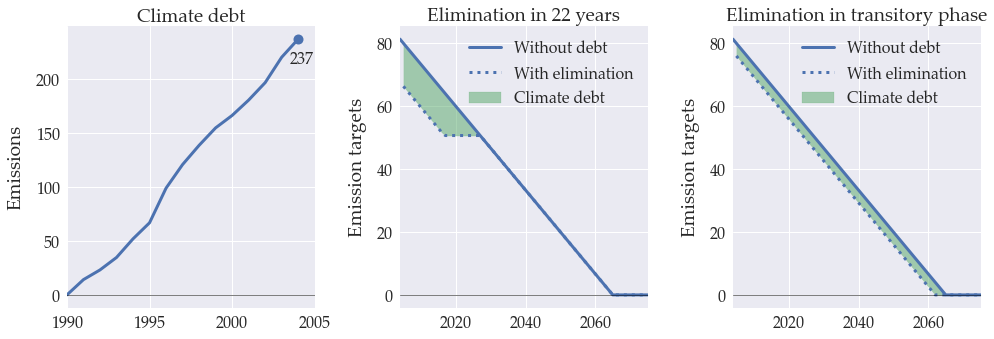

In [12]:
mult_graphs()
fig, axes = plt.subplots(1, 3, figsize = (14, 5));
#plot 1
ax = plt.subplot(1, 3, 1);
climateDebt_V1.plot(ax = ax, linewidth = 3, marker = 'o', markersize = 10, markevery = [-1])
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);
ax.set_xlim([1990, 2005]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emissions', labelpad =10);
ax.set_title('Climate debt')
plt.annotate(f'{int(climateDebt_V1.xs(2004))}', xy = (2003.5,215));

#plot 2
ax = plt.subplot(1, 3, 2)
eliminationExample['Without debt'].plot(ax=ax,linewidth=3, color = colors[0])
eliminationExample['Elimination in 22 years'].plot(ax = ax, linewidth = 3, color = colors[0], linestyle = ':')
ax.fill_between(eliminationExample['Without debt'].loc[2005:T].index, 
                eliminationExample['Without debt'].loc[2005:T], 
                eliminationExample['Elimination in 22 years'].loc[2005:T], alpha = 0.5, color = colors[1])
ax.set_xlim([2004, 2075]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission targets', labelpad =10);
ax.set_title('Elimination in 22 years')
ax.legend(['Without debt','With elimination', 'Climate debt'])
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);

#plot 3
ax = plt.subplot(1, 3, 3)
eliminationExample['Without debt'].plot(ax=ax,linewidth=3, color = colors[0])
eliminationExample['Elimination in transitory phase'].plot(ax = ax, linewidth = 3, color = colors[0], linestyle = ':')
ax.fill_between(eliminationExample['Without debt'].loc[2005:T].index, 
                eliminationExample['Without debt'].loc[2005:T], 
                eliminationExample['Elimination in transitory phase'].loc[2005:T], alpha = 0.5, color = colors[1])
ax.set_xlim([2004, 2075]);
ax.set_xlabel(None, labelpad = 10);
ax.set_ylabel('Emission targets', labelpad =10);
ax.set_title('Elimination in transitory phase')
ax.legend(['Without debt','With elimination', 'Climate debt'])
ax.axhline(y=0, linewidth = 1, color = 'k', alpha = 0.5);

fig.tight_layout();
fig.savefig(f"{d['figs']}\\eliminationExample.pdf",edgecolor='k')

Next, illustrate the time series for accumulated overshoots (Type IIIa, IIIb, IIIc):

In [13]:
os_IIIa = pd.Series([glbls[t].db['qOS_V2'].vals for t in range(1990, 2020)], index = pd.Index(range(1990, 2020), name = 't')) / glbls[1990].db['M1990'].vals * 100
os_IIIb = pd.Series([glbls[t].db['qOS_V3'].vals for t in range(1990, 2020)], index = pd.Index(range(1990, 2020), name = 't')) / glbls[1990].db['M1990'].vals * 100
os_IIIc = pd.Series([glbls[t].db['qOS_V1'].vals for t in range(1990, 2020)], index = pd.Index(range(1990, 2020), name = 't')) / glbls[1990].db['M1990'].vals * 100
dfOS = pd.concat([os_IIIa.rename('Type IIIa'), os_IIIb.rename('Type IIIb'), os_IIIc.rename('Type IIIc')], axis =1)
dfOS.loc[2020]= 0

Plot time series:

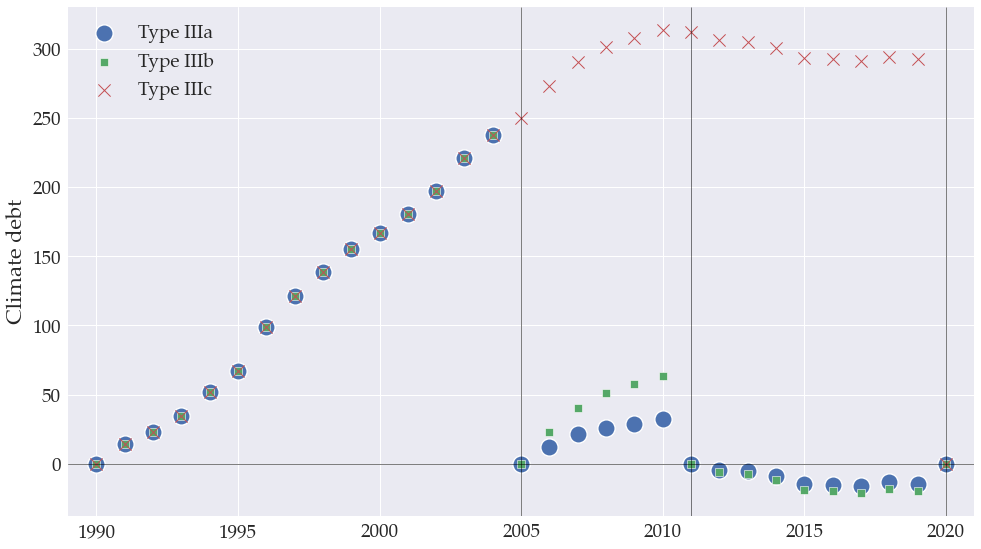

In [14]:
one_graph()
fig, ax = plt.subplots(1,1, figsize = (14, 8));
seaborn.scatterplot(data = dfOS['Type IIIa'], ax = ax, s = 300)
seaborn.scatterplot(data = dfOS['Type IIIb'], ax = ax, s = 50, marker = 's')
seaborn.scatterplot(data = dfOS['Type IIIc'], ax = ax, s = 150, marker = 'x')
ax = plt.subplot(1, 1, 1)
ax.legend(dfOS.columns)
ax.set_xlabel('', labelpad=10);
ax.set_xlim([dfOS.index.min(), dfOS.index.max()]);
ax.set_xlim([1989, 2021]);
ax.set_ylabel('Climate debt');
ax.axhline(y=0, linewidth=1, color = 'k', alpha = 0.5);
ylims = ax.get_ylim();
ax.set_ylim(ylims);
ax.vlines(x=[2005, 2011, 2020], ymin = ylims[0], ymax = ylims[1], linewidth=1, color = 'k', alpha = 0.5);
fig.tight_layout();
fig.savefig(f"{d['figs']}\\comparisonClimateDebt.pdf",edgecolor='k')